# Ridge Regression and the Lasso

In [1]:
# import modules
import pandas as pd
import numpy as np

from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale
from sklearn import cross_validation

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import itertools
%matplotlib inline

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV itera

In [2]:
# load the data
df = pd.read_csv('./datasets/Hitters.csv').dropna().drop('Unnamed: 0', axis=1)
df = pd.get_dummies(df,columns=['League', 'Division', 'NewLeague'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 23 columns):
AtBat          263 non-null int64
Hits           263 non-null int64
HmRun          263 non-null int64
Runs           263 non-null int64
RBI            263 non-null int64
Walks          263 non-null int64
Years          263 non-null int64
CAtBat         263 non-null int64
CHits          263 non-null int64
CHmRun         263 non-null int64
CRuns          263 non-null int64
CRBI           263 non-null int64
CWalks         263 non-null int64
PutOuts        263 non-null int64
Assists        263 non-null int64
Errors         263 non-null int64
Salary         263 non-null float64
League_A       263 non-null uint8
League_N       263 non-null uint8
Division_E     263 non-null uint8
Division_W     263 non-null uint8
NewLeague_A    263 non-null uint8
NewLeague_N    263 non-null uint8
dtypes: float64(1), int64(16), uint8(6)
memory usage: 38.5 KB


In [3]:
# prepare variables
y = df['Salary']
X = df[df.columns.difference(['Salary'])]
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 22 columns):
Assists        263 non-null int64
AtBat          263 non-null int64
CAtBat         263 non-null int64
CHits          263 non-null int64
CHmRun         263 non-null int64
CRBI           263 non-null int64
CRuns          263 non-null int64
CWalks         263 non-null int64
Division_E     263 non-null uint8
Division_W     263 non-null uint8
Errors         263 non-null int64
Hits           263 non-null int64
HmRun          263 non-null int64
League_A       263 non-null uint8
League_N       263 non-null uint8
NewLeague_A    263 non-null uint8
NewLeague_N    263 non-null uint8
PutOuts        263 non-null int64
RBI            263 non-null int64
Runs           263 non-null int64
Walks          263 non-null int64
Years          263 non-null int64
dtypes: int64(16), uint8(6)
memory usage: 36.5 KB


## 1. Ridge Regression

The ${\tt Ridge()}$ function has an alpha argument ($\lambda$, but with a different name!) that is used to tune the model. We'll generate an array of alpha values ranging from very big to very small, essentially covering the full range of scenarios from the null model containing only the intercept, to the least squares fit:

In [4]:
# candidate for hyper-parameters
alpha = 10**np.linspace(10,-2,100)

In [5]:
# create model
ridge = Ridge(normalize=True)
coefs = []

for a in alpha:
    ridge.set_params(alpha = a)
    ridge.fit(X,y)
    coefs.append(ridge.coef_)
    
np.shape(coefs)

(100, 22)

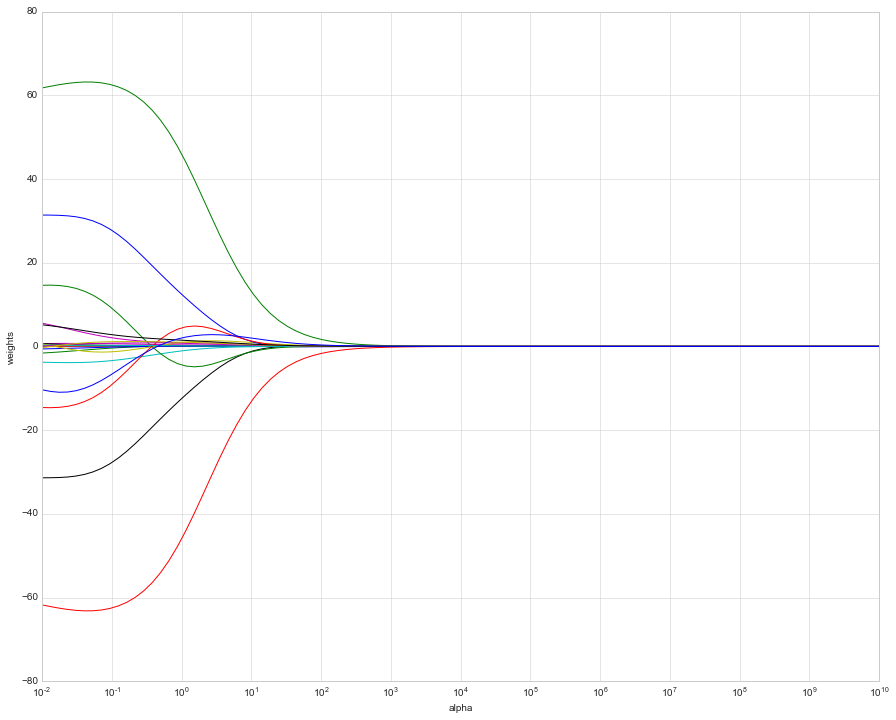

In [6]:
# plot the variation of the coefficients as function of alpha
fig, ax = plt.subplots(figsize=(15,12))
plt.plot(alpha,coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights');

In [7]:
# use cross-validation
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.5,random_state=1)

In [8]:
# fit new model on train data
ridge_v2 = Ridge(alpha=4,normalize=True)
ridge_v2.fit(X_train, y_train)
pred_v2 = ridge_v2.predict(X_test)
print(pd.Series(ridge_v2.coef_, index=X.columns))
print(mean_squared_error(y_test, pred_v2))

Assists        -0.005555
AtBat           0.099126
CAtBat          0.008268
CHits           0.034235
CHmRun          0.269323
CRBI            0.070244
CRuns           0.070559
CWalks          0.082971
Division_E     25.708216
Division_W    -25.708216
Errors          0.223717
Hits            0.446844
HmRun           1.407437
League_A       -3.319243
League_N        3.319243
NewLeague_A    -3.209238
NewLeague_N     3.209238
PutOuts         0.103682
RBI             0.837386
Runs            0.661316
Walks           1.012848
Years           2.811318
dtype: float64
105073.05811443602


In [9]:
# fit new model on train data
ridge_v3 = Ridge(alpha=10**10,normalize=True)
ridge_v3.fit(X_train, y_train)
pred_v3 = ridge_v3.predict(X_test)
print(pd.Series(ridge_v3.coef_, index=X.columns))
print(mean_squared_error(y_test, pred_v3))

Assists       -2.615885e-12
AtBat          1.317464e-10
CAtBat         1.060533e-11
CHits          3.993605e-11
CHmRun         2.959428e-10
CRBI           7.795451e-11
CRuns          8.245247e-11
CWalks         9.894387e-11
Division_E     1.549951e-08
Division_W    -1.549951e-08
Errors         2.084514e-10
Hits           4.647486e-10
HmRun          2.079865e-09
League_A       2.501281e-09
League_N      -2.501281e-09
NewLeague_A    2.023196e-09
NewLeague_N   -2.023196e-09
PutOuts        7.268991e-11
RBI            9.390640e-10
Runs           7.726175e-10
Walks          9.769219e-10
Years          3.961442e-09
dtype: float64
172862.2358023272


As expected, with a large value of alpha, most of the weights are set to values close to 0.

In [10]:
# We now use cross validation to tune alpha
ridgecv = RidgeCV(alphas=alpha, scoring='neg_mean_squared_error', normalize=True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.6579332246575682

In [11]:
ridge_v4 = Ridge(alpha=ridgecv.alpha_,normalize=True)
ridge_v4.fit(X_train, y_train)
pred_v4 = ridge_v4.predict(X_test)
print(pd.Series(ridge_v4.coef_, index=X.columns))
print(mean_squared_error(y_test, pred_v4))

Assists        -0.023421
AtBat           0.011222
CAtBat          0.007256
CHits           0.050949
CHmRun          0.492499
CRBI            0.123548
CRuns           0.104410
CWalks          0.100628
Division_E     55.294785
Division_W    -55.294785
Errors         -0.339990
Hits            0.827846
HmRun          -0.058279
League_A      -11.602995
League_N       11.602995
NewLeague_A    -5.078317
NewLeague_N     5.078317
PutOuts         0.263806
RBI             1.249315
Runs            0.742816
Walks           2.026639
Years           1.600619
dtype: float64
99266.55312693525


## 2. Lasso

In [12]:
# model, fit, and plot
lasso = Lasso(max_iter=10000, normalize=True)
coefs = []

for a in alpha:
    lasso.set_params(alpha=a)
    lasso.fit(X_train,y_train)
    coefs.append(lasso.coef_)

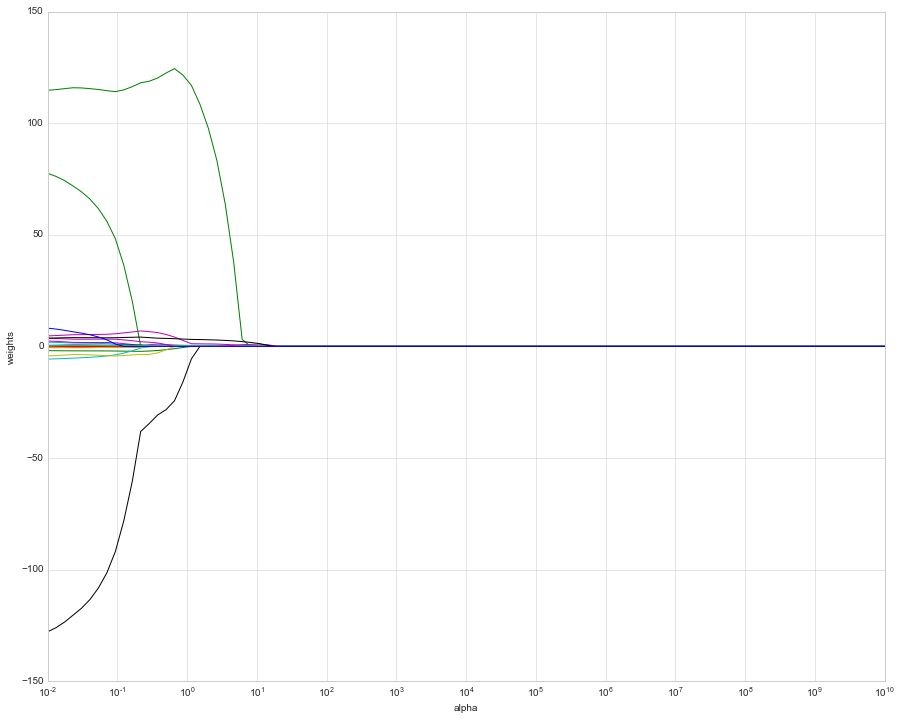

In [13]:
# plot the variation of the coefficients as function of alpha
fig, ax = plt.subplots(figsize=(15,12))
plt.plot(alpha,coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights');

In [14]:
lassocv = LassoCV(alphas=None, cv=10,max_iter=100000, normalize=True)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))

104960.8317007929

In [15]:
# Some of the coefficients are now reduced to exactly zero.
pd.Series(lasso.coef_, index=X.columns)

Assists       -0.000000e+00
AtBat          0.000000e+00
CAtBat         0.000000e+00
CHits          0.000000e+00
CHmRun         2.193045e-01
CRBI           5.139894e-01
CRuns          0.000000e+00
CWalks         0.000000e+00
Division_E     8.906424e+01
Division_W    -9.933155e-15
Errors        -0.000000e+00
Hits           1.082382e+00
HmRun          0.000000e+00
League_A      -0.000000e+00
League_N       0.000000e+00
NewLeague_A   -0.000000e+00
NewLeague_N    0.000000e+00
PutOuts        3.684035e-01
RBI            0.000000e+00
Runs           0.000000e+00
Walks          2.906526e+00
Years          0.000000e+00
dtype: float64